Step 1: Load the Data into Jupyter Notebook

    Run the import and loading cell

    Run the .shape check and got similar output

Step 2: Preview and Understand the Data

    Previewed all 6 datasets using .head()
    
    Run the null check
    
    Run the duplicate check

In [1]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\akram\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import opendatasets as od

In [3]:
dataset = 'https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis'

In [4]:
od.download(dataset)

Skipping, found downloaded files in ".\instacart-market-basket-analysis" (use force=True to force download)


In [5]:
import os

In [6]:
data_dir = 'instacart-market-basket-analysis'

In [7]:
os.listdir(data_dir)

['aisles.csv',
 'departments.csv',
 'orders.csv',
 'order_products__prior.csv',
 'order_products__train.csv',
 'products.csv']

In [8]:
import pandas as pd

In [9]:
!pip install pandas


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\akram\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import os

In [11]:
# Load the CSV files
aisles = pd.read_csv(os.path.join(data_dir, 'aisles.csv'))
departments = pd.read_csv(os.path.join(data_dir, 'departments.csv'))
order_products_prior = pd.read_csv(os.path.join(data_dir, 'order_products__prior.csv'))
order_products_train = pd.read_csv(os.path.join(data_dir, 'order_products__train.csv'))
orders = pd.read_csv(os.path.join(data_dir, 'orders.csv'))
products = pd.read_csv(os.path.join(data_dir, 'products.csv'))

In [12]:
print(aisles.head(10))

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
5         6                       other
6         7               packaged meat
7         8             bakery desserts
8         9                 pasta sauce
9        10            kitchen supplies


In [13]:
print(aisles)


     aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]


In [14]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [15]:
aisles.columns

Index(['aisle_id', 'aisle'], dtype='object')

In [16]:
print(aisles.shape)
print(departments.shape)
print(products.shape)
print(orders.shape)
print(order_products_prior.shape)
print(order_products_train.shape)


(134, 2)
(21, 2)
(49688, 4)
(3421083, 7)
(32434489, 4)
(1384617, 4)


In [17]:
print(aisles.head())
print(departments.head())
print(orders.head())
print(products.head())
print(order_products_prior.head())
print(order_products_train.head())

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                

In [18]:
print("aisles:\n", aisles.isnull().sum())
print("departments:\n", departments.isnull().sum())
print("orders:\n", orders.isnull().sum())
print("products:\n", products.isnull().sum())
print("order_products_prior:\n", order_products_prior.isnull().sum())
print("order_products_train:\n", order_products_train.isnull().sum())

aisles:
 aisle_id    0
aisle       0
dtype: int64
departments:
 department_id    0
department       0
dtype: int64
orders:
 order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64
products:
 product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64
order_products_prior:
 order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
order_products_train:
 order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


Null Check Completed

In [19]:
print("aisles:\n", aisles.duplicated().sum())
print("departments:\n", departments.duplicated().sum())
print("orders:\n", orders.duplicated().sum())
print("products:\n", products.duplicated().sum())
print("order_products_prior:\n", order_products_prior.duplicated().sum())
print("order_products_train:\n", order_products_train.duplicated().sum())

aisles:
 0
departments:
 0
orders:
 0
products:
 0
order_products_prior:
 0
order_products_train:
 0


Duplicate Check Completed

Step 3: Merge: 
    Content-based recommendations (e.g., "show similar products in the same department")

    Human-readable output (not just IDs)

    Visualizations by department or aisle

In [20]:
products_merged = products.merge(aisles, on='aisle_id')

In [21]:
products_full = products_merged.merge(departments, on='department_id')

In [22]:
print(products_full.head())

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id                       aisle department  
0             19               cookies cakes     snacks  
1             13           spices seasonings     pantry  
2              7                         tea  beverages  
3              1                frozen meals     frozen  
4             13  marinades meat preparation     pantry  


merge completed




Step 4:Combine Order-Product Tables

In [23]:
# Combine both prior and train order-product records
order_products = pd.concat([order_products_prior, order_products_train])

# Reset index (optional, for cleanliness)
order_products.reset_index(drop=True, inplace=True)

# Preview
order_products.head()


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [24]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [25]:
print(order_products.shape)
print(order_products['order_id'].nunique())  # how many orders
print(order_products['product_id'].nunique())  # how many products


(33819106, 4)
3346083
49685


Step 5: Merge user_id into the combined order-products table.
So far, order_products has:

order_id

product_id

add_to_cart_order

reordered

But it does not include user_id, which we need for:

Collaborative filtering (user-product matrix)

Analyzing user behavior



In [26]:
# Merge order_products with orders to get user_id
order_merged = order_products.merge(orders[['order_id', 'user_id']], on='order_id')

# Preview the result
order_merged.head()


,order_id,product_id,add_to_cart_order,reordered,user_id
0,2,33120,1,1,202279
1,2,28985,2,1,202279
2,2,9327,3,0,202279
3,2,45918,4,1,202279
4,2,30035,5,0,202279


In [27]:
order_merged = order_merged[['user_id', 'order_id', 'product_id', 'add_to_cart_order', 'reordered']]
order_merged.head()


,user_id,order_id,product_id,add_to_cart_order,reordered
0,202279,2,33120,1,1
1,202279,2,28985,2,1
2,202279,2,9327,3,0
3,202279,2,45918,4,1
4,202279,2,30035,5,0


In [28]:
order_merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 5 columns):
 #   Column             Dtype
---  ------             -----
 0   user_id            int64
 1   order_id           int64
 2   product_id         int64
 3   add_to_cart_order  int64
 4   reordered          int64
dtypes: int64(5)
memory usage: 1.3 GB


step5 :  completed


Step6: Clean nulls & duplicates + create user-product interactions.




In [29]:
order_merged.isnull().sum()


user_id              0
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [30]:
order_merged.duplicated().sum()


np.int64(0)

In [31]:
user_product = order_merged.groupby(['user_id', 'product_id']).size().reset_index(name='purchase_count')
user_product.head()


,user_id,product_id,purchase_count
0,1,196,11
1,1,10258,10
2,1,10326,1
3,1,12427,10
4,1,13032,4


In [32]:
user_product.sort_values(by='purchase_count', ascending=False).head(10)


,user_id,product_id,purchase_count
2767396,41356,38652,100
2767339,41356,6583,100
2767357,41356,14366,100
2767381,41356,29671,99
9538863,141736,25133,99
6988289,103593,28204,99
1202643,17997,4210,99
8153917,120897,12013,98
6727579,99707,24852,98
4704707,69919,24852,97


cleaned nulls & duplicates

created user_product table

Step 7: Save cleaned data or move to model-building.

In [34]:
# Save the interaction data
#user_product.to_csv('user_product_interactions.csv', index=False)

# Also save cleaned product metadata (if needed for content-based filtering)
#products_full.to_csv('products_cleaned.csv', index=False)
# (Optional) Save order_merged
#order_merged.to_csv('orders_merged.csv', index=False)


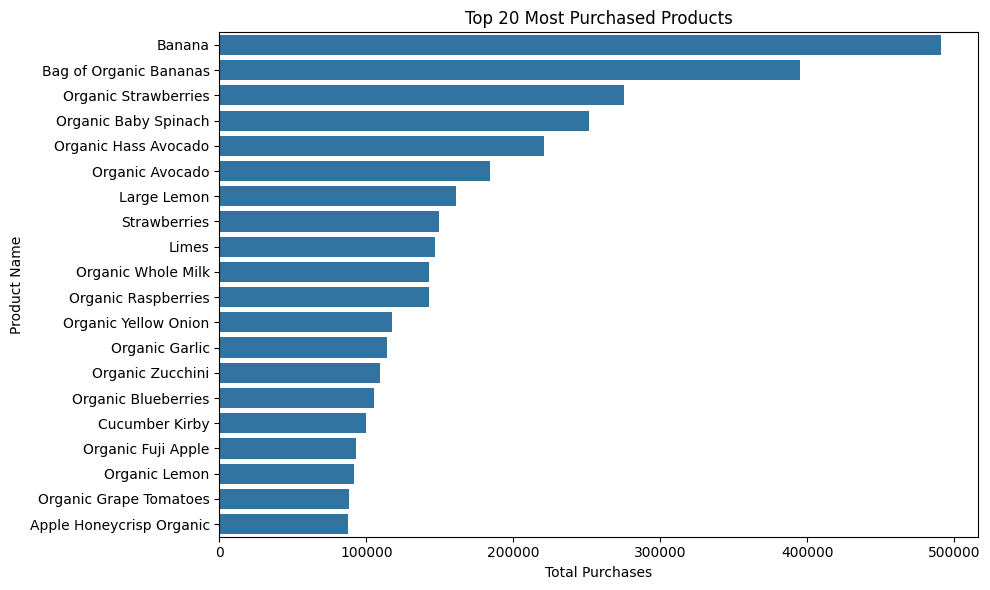

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge product names into user_product
top_products = user_product.merge(products_full[['product_id', 'product_name']], on='product_id')

# Group and sort
top_20 = top_products.groupby('product_name')['purchase_count'].sum().sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(y=top_20.index, x=top_20.values)
plt.title("Top 20 Most Purchased Products")
plt.xlabel("Total Purchases")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


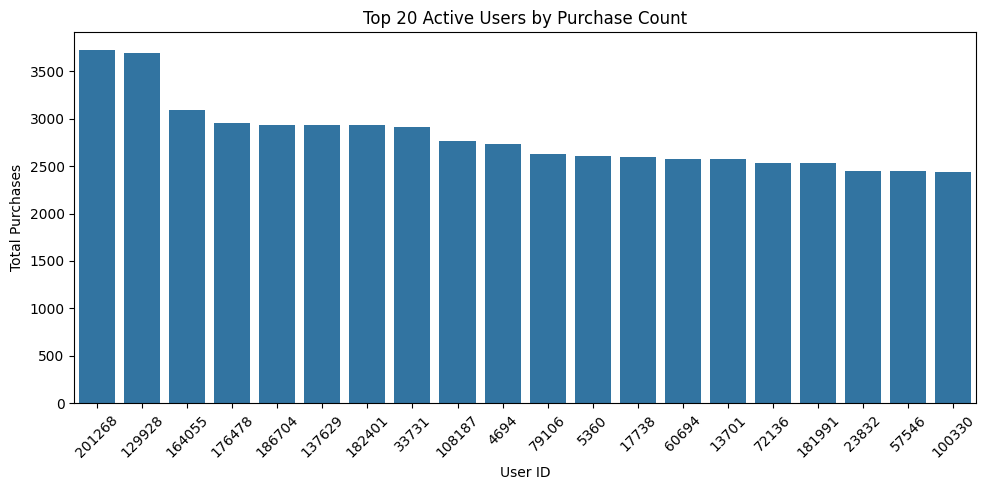

In [36]:
top_users = user_product.groupby('user_id')['purchase_count'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10,5))
sns.barplot(x=top_users.index.astype(str), y=top_users.values)
plt.title("Top 20 Active Users by Purchase Count")
plt.xlabel("User ID")
plt.ylabel("Total Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


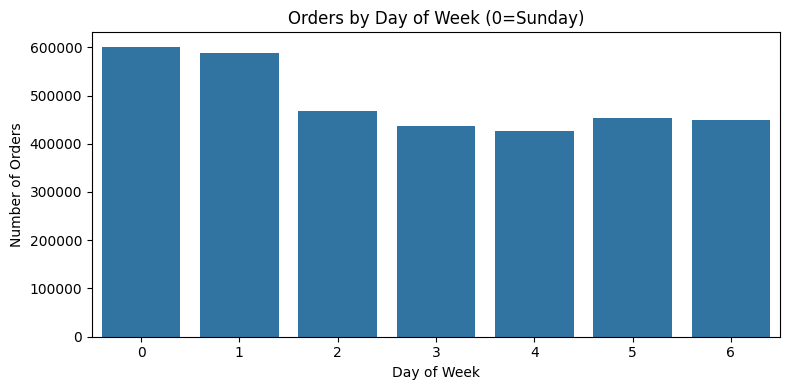

In [37]:
# Orders per day of the week
dow_counts = orders['order_dow'].value_counts().sort_index()

plt.figure(figsize=(8,4))
sns.barplot(x=dow_counts.index, y=dow_counts.values)
plt.title("Orders by Day of Week (0=Sunday)")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


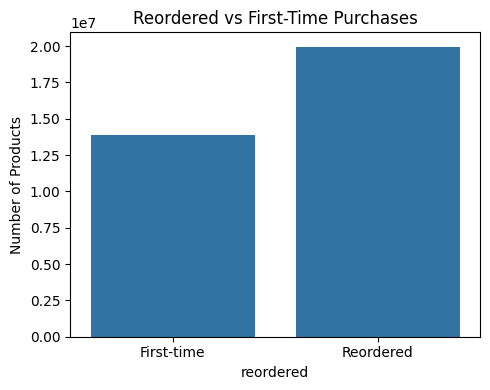

In [38]:
reorder_counts = order_merged['reordered'].value_counts().sort_index()

plt.figure(figsize=(5,4))
sns.barplot(x=reorder_counts.index.map({0: 'First-time', 1: 'Reordered'}), y=reorder_counts.values)
plt.title("Reordered vs First-Time Purchases")
plt.ylabel("Number of Products")
plt.tight_layout()
plt.show()


Which Departments Have the Most Orders?

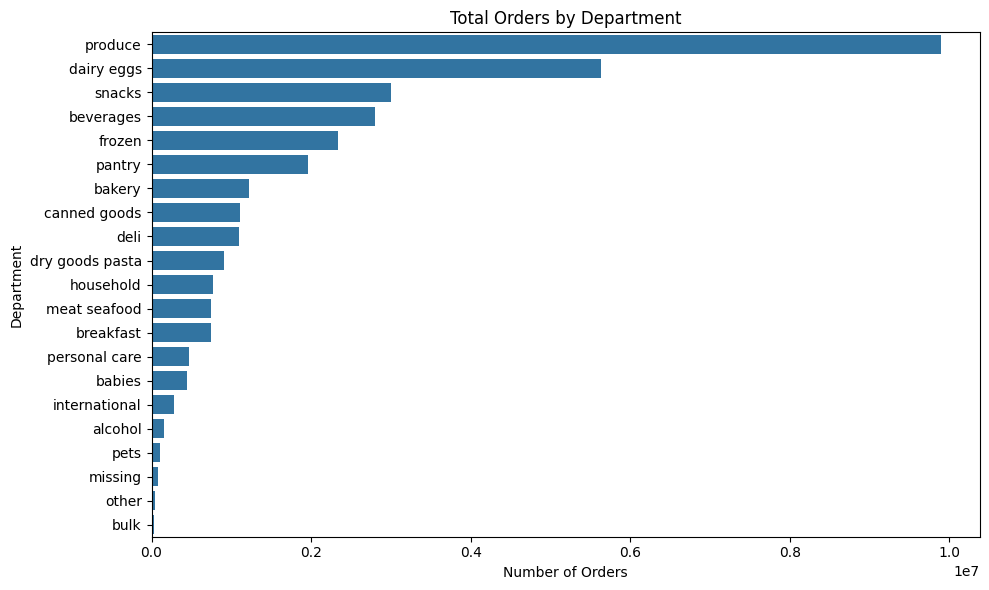

In [39]:
# Merge order_merged with product metadata to get department
order_with_dept = order_merged.merge(products_full[['product_id', 'department']], on='product_id')

# Count by department
dept_counts = order_with_dept['department'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(y=dept_counts.index, x=dept_counts.values)
plt.title("Total Orders by Department")
plt.xlabel("Number of Orders")
plt.ylabel("Department")
plt.tight_layout()
plt.show()
